In [10]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install statsmodels
!pip list

You should consider upgrading via the 'C:\Users\asus\Documents\Phyton\Pacmann\Probability\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\asus\Documents\Phyton\Pacmann\Probability\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\asus\Documents\Phyton\Pacmann\Probability\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\asus\Documents\Phyton\Pacmann\Probability\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\asus\Documents\Phyton\Pacmann\Probability\venv\Scripts\python.exe -m pip install --upgrade pip' command.


Package                   Version
------------------------- ------------
anyio                     4.2.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.14.0
beautifulsoup4            4.12.2
bleach                    6.1.0
certifi                   2023.11.17
cffi                      1.16.0
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.0
contourpy                 1.2.0
cycler                    0.12.1
debugpy                   1.8.0
decorator                 5.1.1
defusedxml                0.7.1
exceptiongroup            1.2.0
executing                 2.0.1
fastjsonschema            2.19.0
fonttools                 4.47.0
fqdn                      1.5.1
idna                      3.6
ipykernel                 6.27.1
ipython                   8.19.0
isoduration      

You should consider upgrading via the 'C:\Users\asus\Documents\Phyton\Pacmann\Probability\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, wilcoxon, ttest_1samp, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

In [13]:
cwd = os.getcwd()
cwd
project_dir = 'C:\\Users\\asus\\Documents\\Phyton\\Pacmann\\Probability'
os.chdir(project_dir)
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
#Descritive statistics
#rata-rata usia
mean_age = insurance_df['age'].mean()
mean_age

39.20702541106129

In [19]:
#rata-rata bmi
mean_bmi = insurance_df['bmi'].mean()
mean_bmi

30.66339686098655

In [20]:
#compare charge variance of smoker and non smoker
charges_smoker_variance_df = insurance_df.groupby('smoker')['charges'].var()
charges_smoker_variance_df
#variance tagihan kesehatan perokok lebih kecil dari tagihan non perokok

smoker
no     3.592542e+07
yes    1.332073e+08
Name: charges, dtype: float64

In [21]:
#compare age mean of males and females
age_sex_mean_df = insurance_df.groupby('sex')['age'].mean()
age_sex_mean_df
#rata-rata umur penerima tagihan berbeda 0.586 antara laki-laki dan perempuan

sex
female    39.503021
male      38.917160
Name: age, dtype: float64

In [22]:
#compare charge mean of smoker and non smoker
charges_smoker_mean_df = insurance_df.groupby('smoker')['charges'].mean()
charges_smoker_mean_df
#rata-rata tagihan kesehatan perokok hampir 4 kali lipat dari tagihan kesehatan non perokok

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [23]:
#compare charges mean of smoker with bmi>25 and non smoker with bmi>25
threshold = 25
insurance_df['weight'] = insurance_df['bmi'].apply(lambda x: 'overweight' if x > 25 else 'not overweight')
insurance_df.head(5)
charges_smokerweight_mean_df = insurance_df.groupby(['weight','smoker'])['charges'].mean()
charges_smokerweight_mean_df
#rata-rata tagihan perokok dengan bmi>25 sekitar 4.07 kali lipat dari tagihan non perokok dengan bmi>25

weight          smoker
not overweight  no         7547.184007
                yes       19839.278309
overweight      no         8629.589610
                yes       35116.909657
Name: charges, dtype: float64

In [24]:
#compare bmi mean of smoker and non smoker
bmi_smoker_mean_df = insurance_df.groupby('smoker')['bmi'].mean()
bmi_smoker_mean_df
#rata-rata bmi perokok hampir tak jauh berbeda dengan non perokok

smoker
no     30.651795
yes    30.708449
Name: bmi, dtype: float64

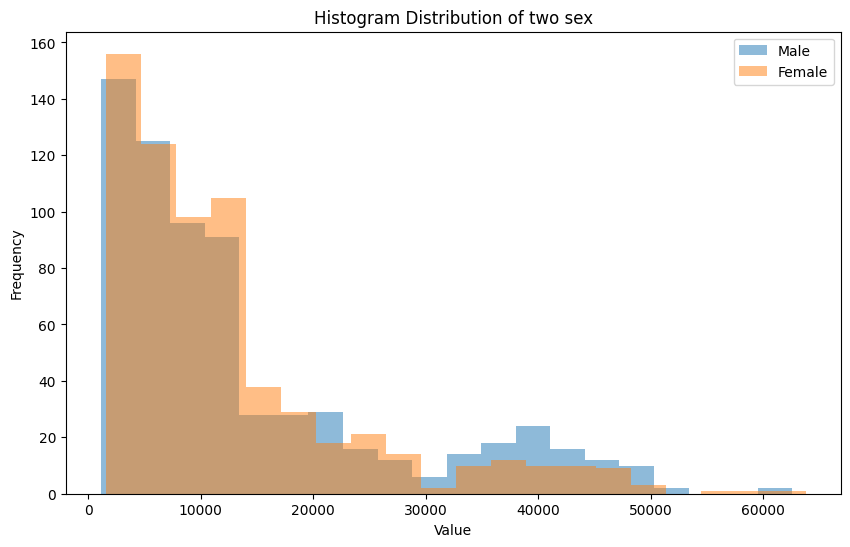

In [25]:
#Discrete analysis
#Which sex has most charges?
charges_sex_mean_df = insurance_df.groupby('sex')['charges'].mean()
charges_sex_mean_df
#tagihan laki-laki lebih besar daripada tagihan wanita
male_group = insurance_df[insurance_df['sex']=='male']
female_group = insurance_df[insurance_df['sex']=='female']
#set figure size to 10 x 6 inch
plt.figure(figsize=(10,6))
#plot histogram with transparency level of 0.5
plt.hist(male_group['charges'], bins=20, alpha=0.5, label = 'Male')
plt.hist(female_group['charges'], bins=20, alpha=0.5, label = 'Female')
plt.title('Histogram Distribution of two sex')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()
#bentuk distribusi keduanya sama-sama skew ke kiri
#jumlah frekuensi untuk nilai di bawah 30000 lebih banyak perempuan
#jumlah frekuensi untuk nilai di atas 30000 lebih banyak laki laki

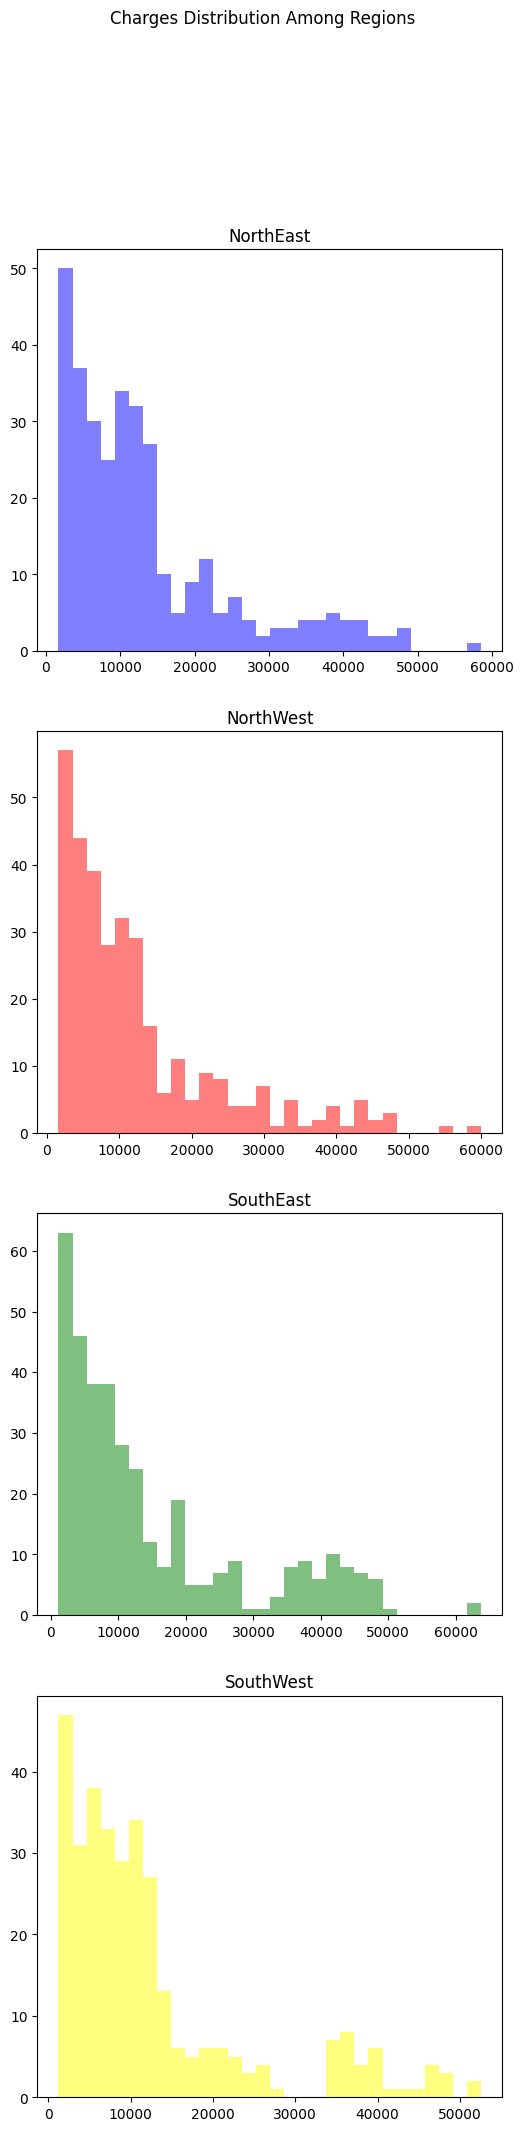

In [26]:
#Display probability distribution of charges across regions
NE_region = insurance_df[insurance_df['region']=='northeast']
NW_region = insurance_df[insurance_df['region']=='northwest']
SE_region = insurance_df[insurance_df['region']=='southeast']
SW_region = insurance_df[insurance_df['region']=='southwest']
#create subplot. 1 dimension. 4 rows, 1 column
fig, axs = plt.subplots(4,1, figsize = (6, 24))

axs[0].hist(NE_region['charges'], bins=30, color = 'blue', alpha = 0.5)
axs[0].set_title('NorthEast')

axs[1].hist(NW_region['charges'], bins=30, color = 'red', alpha = 0.5)
axs[1].set_title('NorthWest')

axs[2].hist(SE_region['charges'], bins=30, color = 'green', alpha = 0.5)
axs[2].set_title('SouthEast')

axs[3].hist(SW_region['charges'], bins=30, color = 'yellow', alpha = 0.5)
axs[3].set_title('SouthWest')

fig.suptitle('Charges Distribution Among Regions')

plt.show()
#Keseluruhan distribusi di semua region menunjukkan left skewed distribution

In [27]:
#compare proportion of number of people across region
prop_region_df = insurance_df.groupby('region')['region'].value_counts(normalize=True).reset_index()
prop_region_df
#proporsi banyak orang antar region sama

,region,proportion
0,northeast,1.0
1,northwest,1.0
2,southeast,1.0
3,southwest,1.0


In [28]:
#compare proportion on number of people between smoker and non smoker
prop_smoker_df = insurance_df.groupby('smoker')['smoker'].value_counts(normalize=True).reset_index()
prop_smoker_df
#proporsi jumlah orang antara perokok dan non perokok sama

,smoker,proportion
0,no,1.0
1,yes,1.0


In [29]:
#calculate probability of sex is female given sample is smoker
p_female_andsmoker = insurance_df[(insurance_df['sex'] == 'female') & (insurance_df['smoker'] == 'yes')].shape[0] / len(insurance_df)
p_female_andsmoker
#probability of sex is female and is a smoker is 0.008595

0.08594917787742899

In [30]:
p_smoker = insurance_df[insurance_df['smoker'] == 'yes'].shape[0] / len(insurance_df)
p_smoker
#probability of sample is a smoker is 0.2047
#notetoself : .value_counts(normalize=True) returns false proportion, .shape[0] / len(df) is more suitable

0.20478325859491778

In [31]:
p_female_givensmoker = p_female_andsmoker / p_smoker
p_female_givensmoker
#probability of sex is female, given the sample is a smoker is 0.4197

0.4197080291970803

In [32]:
#calculate probability of sex is male, given sample is smoker
p_male_andsmoker = insurance_df[(insurance_df['sex'] == 'male') & (insurance_df['smoker'] == 'yes')].shape[0] / len(insurance_df)
p_male_andsmoker
#probability of sample is male and a smoker is 0.1188
p_male_givensmoker = p_male_andsmoker / p_smoker
p_male_givensmoker
#probability of sex is male, given the sample is smoker is 0.5803

0.5802919708029197

In [33]:
#what shape is prabability distribution function of charges across region
#as seen in line 26, the form is left skewed on all regions

In [34]:
#compare probabilities of sample bmi > 25 and charges > 16700 with sample bmi < 25 and charges > 16700
filtered_data = insurance_df[(insurance_df['charges'] > 16700)]
p_lowbmi_highcharges = filtered_data[(filtered_data['bmi'] < 25)].shape[0] / len(filtered_data)
p_lowbmi_highcharges
#probabilities of sample bmi < 25 and charges > 16700 is 0.1527
p_highbmi_highcharges = filtered_data[(filtered_data['bmi'] > 25)].shape[0] / len(filtered_data)
p_highbmi_highcharges
#probabilities of sample bmi > 25 and charges > 16700 is 0.8473
#overweight people are more likely to have charges more than 16700

0.8473053892215568

In [35]:
#compare probabilities of smoker and non smoker from overweight and charges > 16700 group
filtered_data = insurance_df[(insurance_df['charges'] > 16700) & (insurance_df['bmi'] > 25)]
p_smoker_overweighthighcharges = filtered_data[filtered_data['smoker'] == 'yes'].shape[0] / len(filtered_data)
p_smoker_overweighthighcharges
#probability of sample is smoker, overweight and have charged over 16700 is 0.7597
p_nonsmoker_overweighthighcharges = 1 - p_smoker_overweighthighcharges
p_nonsmoker_overweighthighcharges
#probability of sample is non smoker, overweight and have charged over 16700 is 0.2403
#from said group, smoker is more likely overweight and charged over 16700

0.24028268551236753

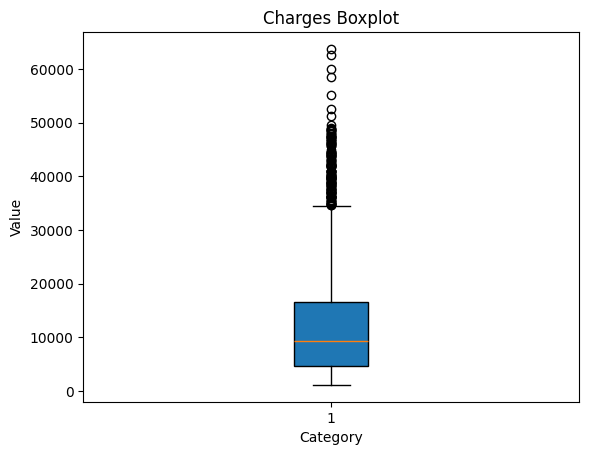

[1121.8739, 34472.841]


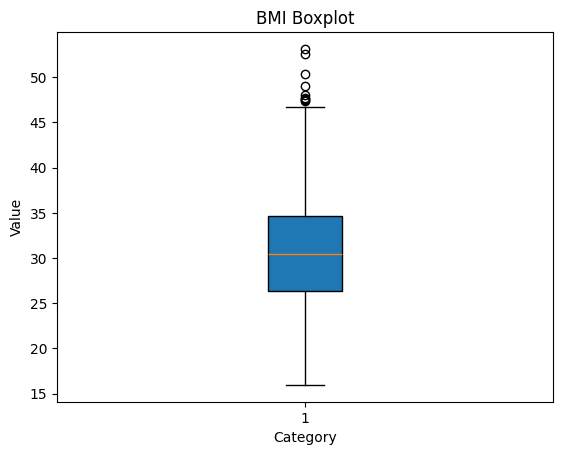

[15.96, 46.75]


In [7]:
#calculate correlation between charge with minimal 2 other variables
#i should remove outlier ...
#calculating correlation between charges and bmi
charges_series = insurance_df['charges']
bmi_series = insurance_df['bmi']
#drawing boxplot to detect outlier
charges_bp = plt.boxplot(charges_series, vert=True, patch_artist=True)
plt.title('Charges Boxplot')
plt.xlabel('Category')
plt.ylabel('Value')
#plt.xticks([1,2,3],['Category 1','Category 2','Category 3'])--> not used
plt.show()
#yes, getting upper whisker and lower whisker value for boxplot uses the same code. this is list comprehension
charges_whiskers = [whisker.get_ydata()[1] for whisker in charges_bp['whiskers'] if whisker.get_ydata()[1] is not None]
print(charges_whiskers)
#drawing boxplot to detect outlier
bmi_bp = plt.boxplot(bmi_series, vert=True, patch_artist=True)
plt.title('BMI Boxplot')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

bmi_whiskers = [whisker.get_ydata()[1] for whisker in bmi_bp['whiskers'] if whisker.get_ydata()[1] is not None]
print(bmi_whiskers)


In [37]:
#filtering outlier for both charges and bmi
insurance_df_deoutlier = insurance_df[(insurance_df['charges'] >= charges_whiskers[0]) & (insurance_df['charges'] <= charges_whiskers[1]) & (insurance_df['bmi'] >= bmi_whiskers[0]) & (insurance_df['bmi'] <= bmi_whiskers[1])]
#notetoself: .size counts each value on all columns and sums them all. it multiplies num of records and column
n = insurance_df_deoutlier['charges'].size
original_n = insurance_df['charges'].size
print(f'sample size after outlier removal is {n} from original sample size of {original_n}')



sample size after outlier removal is 1193 from original sample size of 1338


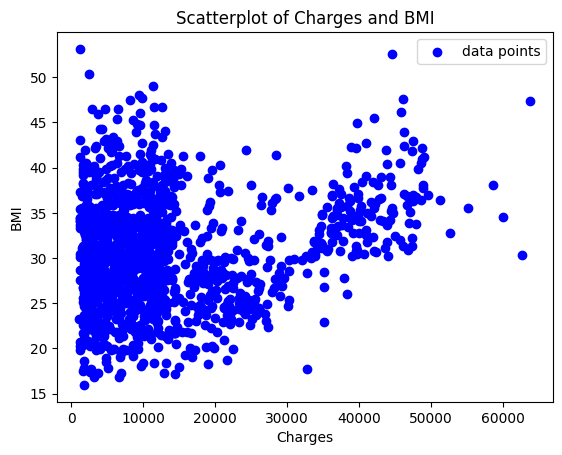

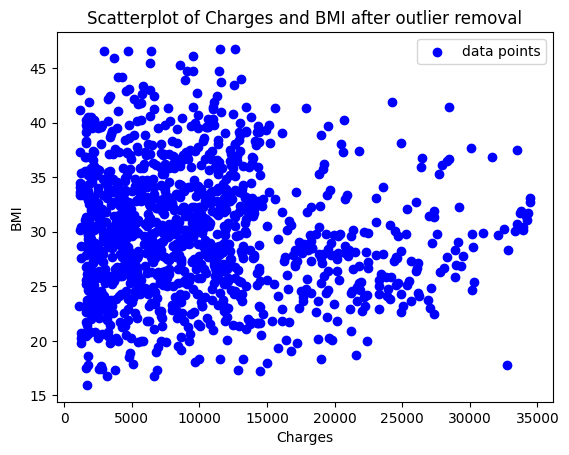

Besar nilai korelasi antara tagihan dan bmi adalah 0.1194 dengan p_value : 0.0000
Besar nilai korelasi antara tagihan dan bmi pasca eliminasi outlier adalah -0.0417 dengan p_value : 0.1497


In [40]:
#drawing scatterplot
plt.scatter(charges_series, bmi_series, color='blue', marker='o', label='data points')
plt.xlabel('Charges')
plt.ylabel('BMI')
plt.title('Scatterplot of Charges and BMI')
plt.legend()
plt.show()

plt.scatter(insurance_df_deoutlier['charges'], insurance_df_deoutlier['bmi'], color='blue', marker='o', label='data points')
plt.xlabel('Charges')
plt.ylabel('BMI')
plt.title('Scatterplot of Charges and BMI after outlier removal')
plt.legend()
plt.show()
#notetoself:there is no dependent variable in correlation. any order would be fine
#comparing spearman correlation between original data and deoutlier data, is it impactful?
#spearman is used since charges data distribution does not follow normality assumption
#so non parametric correlation is used instead of parametric one
spearman_corr, p_values = spearmanr(charges_series, bmi_series)
print(f'Besar nilai korelasi antara tagihan dan bmi adalah {spearman_corr:.4f} dengan p_value : {p_values:.4f}')
spearman_corr, p_values = spearmanr(insurance_df_deoutlier['charges'], insurance_df_deoutlier['bmi'])
print(f'Besar nilai korelasi antara tagihan dan bmi pasca eliminasi outlier adalah {spearman_corr:.4f} dengan p_value : {p_values:.4f}')
#hasil menunjukkan bahwa sebelum outlier removal data menunjukkan korelasi yang lebih signifikan secara statistik daripada sesudah
#kedua hasil menunjukkan korelasi yang lemah antara tagihan dan bmi 

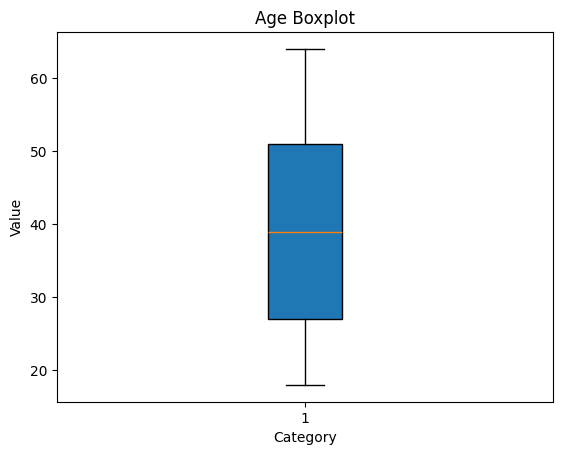

[18.0, 64.0]


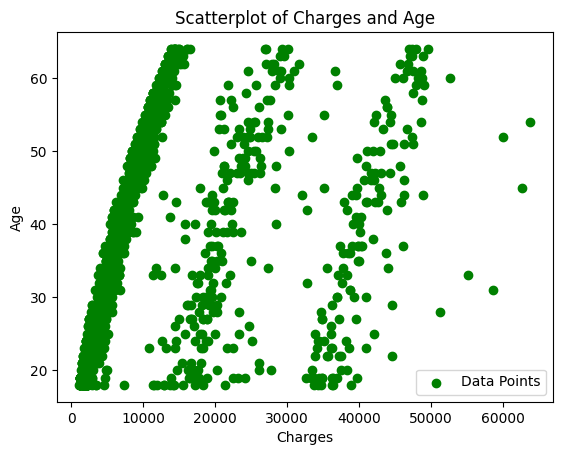

Besar nilai korelasi antara tagihan dan umur adalah 0.5344 dengan p_value : 0.0000


In [10]:
#korelasi antara tagihan dan bmi lemah di nilai 0.1983 dengan signifikansi di bawah 0.05
#calculating correlation between charges and age
age_series = insurance_df['age']
#drawing boxplot to detect outlier
age_bp = plt.boxplot(age_series, vert=True, patch_artist=True)
plt.title('Age Boxplot')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

age_whiskers = [whisker.get_ydata()[1] for whisker in age_bp['whiskers'] if whisker.get_ydata()[1] is not None]
print(age_whiskers)
#data tidak memiliki outlier
#drawing scatterplot
plt.scatter(charges_series, age_series, color='green', marker='o', label='Data Points')
plt.title('Scatterplot of Charges and Age')
plt.xlabel('Charges')
plt.ylabel('Age')
plt.legend()
plt.show()

spearman_corr, p_values = spearmanr(charges_series, age_series)
print(f'Besar nilai korelasi antara tagihan dan umur adalah {spearman_corr:.4f} dengan p_value : {p_values:.4f}')
#korelasi antara tagihan dan umur kuat di nilai 0.5344 dengan p_value 0.0000
#korelasi positif, dalam artian semakin tua umur, semakin besar tagihan kesehatan


In [19]:
#Hypotheses testing
insurance_df['charges'].median()
Ho = 'Tagihan kesehatan  < median sampel (9382.033)'
Hi = 'Tagihan kesehatan  >= median sampel (9382.033)'
alpha = 0.05
#statistik uji yang digunakan non parametrik (karena distribusi tagihan tidak normal) wilcoxon untuk satu sampel
#karena wilcoxon menguji distribusi sampel dengan asumsi median = 0, perlu dilakukan transformasi
charges_wilcoxon_series = insurance_df['charges'] - insurance_df['charges'].median()
#hitung statistik uji wilcoxon
statistic, p_value = wilcoxon(charges_wilcoxon_series, alternative='greater')
if p_value <= alpha :
    result = f'dengan tingkat konfidensi {(1-p_value)*100:.4f}% menolak {Ho}'
else:
    result = f'dengan tingkat konfidensi {(1-p_value)*100:.4f}% gagal menolak {Ho}'
print(f'Hasil statistik uji wilcoxon menunjukkan bahwa {result}')
#Hasil menunjukkan bahwa median tagihan kesehatan populasi lebih besar dari USD 9382.033 

Hasil statistik uji wilcoxon menunjukkan bahwa dengan tingkat konfidensi 99.9997% menolak Tagihan kesehatan  < median sampel (9382.033)


In [22]:
insurance_df['age'].mean()
Ho = 'Rata-rata umur orang bertagihan kesehatan sama dengan 39 tahun'
Hi = 'Rata-rata umur orang bertagihan kesehatan tidak sama dengan 39 tahun'
alpha = 0.05 / 2
#statistik uji yang digunakan parametrik (data berdistribusi normal berdasar boxplot) two tailed
null_mean = 39
t_statistic, p_value = ttest_1samp(insurance_df['age'],null_mean)
if p_value < alpha :
    result = f'dengan tingkat konfidensi {(1-p_value)*100:.4f}% menolak {Ho}'
else:
    result = f'dengan tingkat konfidensi {(1-p_value)*100:.4f}% gagal menolak {Ho}'
print(f'Hasil statistik uji t menunjukkan bahwa {result}')
#Hasil menunjukkan bahwa kebanyakan orang dengan usia 39 tahun memiliki tagihan kesehatan

Hasil statistik uji t menunjukkan bahwa dengan tingkat konfidensi 41.0013% gagal menolak Rata-rata umur orang bertagihan kesehatan sama dengan 39 tahun


In [18]:
male_count = insurance_df[insurance_df['sex'] == 'male']['sex'].count()
male_proportion = male_count / insurance_df['sex'].count().sum()
male_proportion
Ho = 'Proporsi laki-laki di populasi orang bertagihan kesehatan >= 0.5' #since people assume men smoke thus more likely has health problems
Hi = 'Proporsi laki-laki di populasi orang bertagihan kesehatan < 0.5'
n= 1338
dof = n-1
null_proportion = 0.5
alpha = 0.05
#untuk statistik uji digunakan z score
#awalnya hendak menggunakan t score, namun library proportion_ttest tak lagi ditemukan
#secara jumlah sampel juga sudah cukup tinggi (1338), sehingga bentuk distribusi diperkirakan sudah mendekati normal
z_statistic, p_value = proportions_ztest(male_count, n, null_proportion, alternative='smaller')

if p_value < alpha :
    result = f'dengan tingkat konfidensi {(1-p_value)*100:.4f}% menolak {Ho}'
else:
    result = f'dengan tingkat konfidensi {(1-p_value)*100:.4f}% gagal menolak {Ho}'
print(f'Hasil statistik uji z menunjukkan bahwa {result}')
#hasil menunjukkan gagal menolak Ho, sehingga masih diterima bahwa proporsi laki-laki yang memiliki tagihan kesehatan >= 0.5

Hasil statistik uji z menunjukkan bahwa dengan tingkat konfidensi 35.0950% gagal menolak Proporsi laki-laki di populasi orang bertagihan kesehatan >= 0.5


In [21]:
charges_male_group = insurance_df[insurance_df['sex'] == 'male']['charges']
charges_female_group = insurance_df[insurance_df['sex'] == 'female']['charges']
Ho = 'Median tagihan kesehatan antara laki-laki >= median tagihan kesehatan perempuan'
Hi = 'Median tagihan kesehatan antara laki-laki < median tagihan kesehatan perempuan'

#statistik uji yang digunakan untuk 2 kelompok tidak berdistribusi normal adalah mann-whitney
statistic, p_value = mannwhitneyu(charges_male_group, charges_female_group, alternative='less')

if p_value < alpha :
    result = f'dengan tingkat konfidensi {(1-p_value)*100:.4f}% menolak {Ho}'
else:
    result = f'dengan tingkat konfidensi {(1-p_value)*100:.4f}% gagal menolak {Ho}'
print(f'Hasil statistik uji mann whitney menunjukkan bahwa {result}')
#hasil menunjukkan hipotesa median tagihan kesehatan antara laki-laki >= median tagihan kesehatan perempuan gagal ditolak

Hasil statistik uji mann whitney menunjukkan bahwa dengan tingkat konfidensi 36.4272% gagal menolak Median tagihan kesehatan antara laki-laki >= median tagihan kesehatan perempuan
